[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from ft_finetuning import *
from common_helpers import *
from plotting_helper import *

In [2]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

In [3]:
gpu, cpu = get_devices()

In [4]:
ft_txt_only_results = run_k_fold(gpu, data, 'ft_vector', fusion=FusionTypes.TXT, k_folds=5,
                              epochs=15, balance_classes=True,
                              dropout_level=0.1, lr=5e-4,
                              clip_at=1.0)

Running Text Only Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.676
Time for epoch : 0.179526 seconds
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.598 / Validation : 0.412
Time for epoch : 0.248011 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.395 / Validation : 0.352
Time for epoch : 0.260862 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.343 / Validation : 0.352
Time for epoch : 0.298367 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.302 / Validation : 0.338
Time for epoch : 0.354027 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.274 / Validation : 0.348
Time for epoch : 0.371386 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.251 / Validation : 0.359
Time for epoch : 0.166413 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.239 / Validation : 0.410
Time for epoch : 0.183858 seconds
Epoch 9 / 15
Training Model

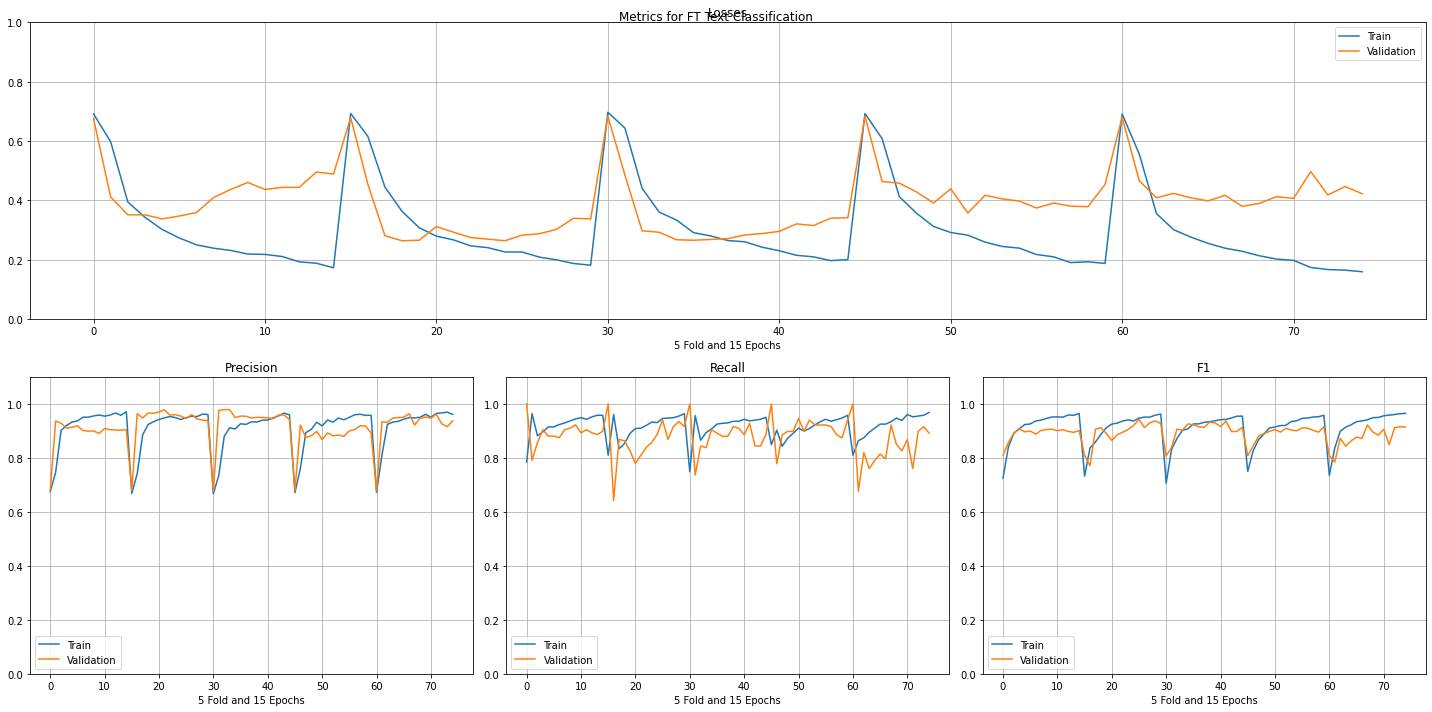

In [5]:
plot_results(ft_txt_only_results[0],'FT Text Classification')

In [6]:
ft_txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
10,0.947605,0.943284,0.949025,0.946108,0.946188,0.940476,0.226365,0.283183
13,0.958740,0.937313,0.962349,0.940120,0.955157,0.934524,0.187643,0.340215
11,0.942943,0.936556,0.948640,0.945122,0.937313,0.928144,0.215395,0.321085
8,0.934426,0.932927,0.933036,0.950311,0.935821,0.916168,0.260691,0.283808
12,0.951311,0.930514,0.953453,0.944785,0.949178,0.916667,0.200014,0.302501
...,...,...,...,...,...,...,...,...
0,0.750165,0.808717,0.671783,0.678862,0.849254,1.000000,0.692874,0.683562
0,0.735274,0.808717,0.672862,0.678862,0.810448,1.000000,0.691530,0.680686
0,0.706048,0.806763,0.667553,0.676113,0.749254,1.000000,0.697288,0.684252
1,0.836705,0.784722,0.810924,0.933884,0.864179,0.676647,0.555877,0.466186


In [7]:
ft_mfcc_fusion_results = run_k_fold(gpu, data, 'ft_vector', fusion=FusionTypes.MFCC, k_folds=5,
                              epochs=15, balance_classes=True,
                              dropout_level=0.2, lr=7e-4,
                              clip_at=1.0)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.704 / Validation : 0.690
Time for epoch : 0.400134 seconds
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.690
Time for epoch : 0.375206 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.640 / Validation : 0.575
Time for epoch : 0.391412 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.494 / Validation : 0.483
Time for epoch : 0.408359 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.397 / Validation : 0.396
Time for epoch : 0.402349 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.349 / Validation : 0.413
Time for epoch : 0.407757 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.311 / Validation : 0.371
Time for epoch : 0.379165 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.274 / Validation : 0.416
Time for epoch : 0.368633 seconds
Epoch 9 / 15
Training Model

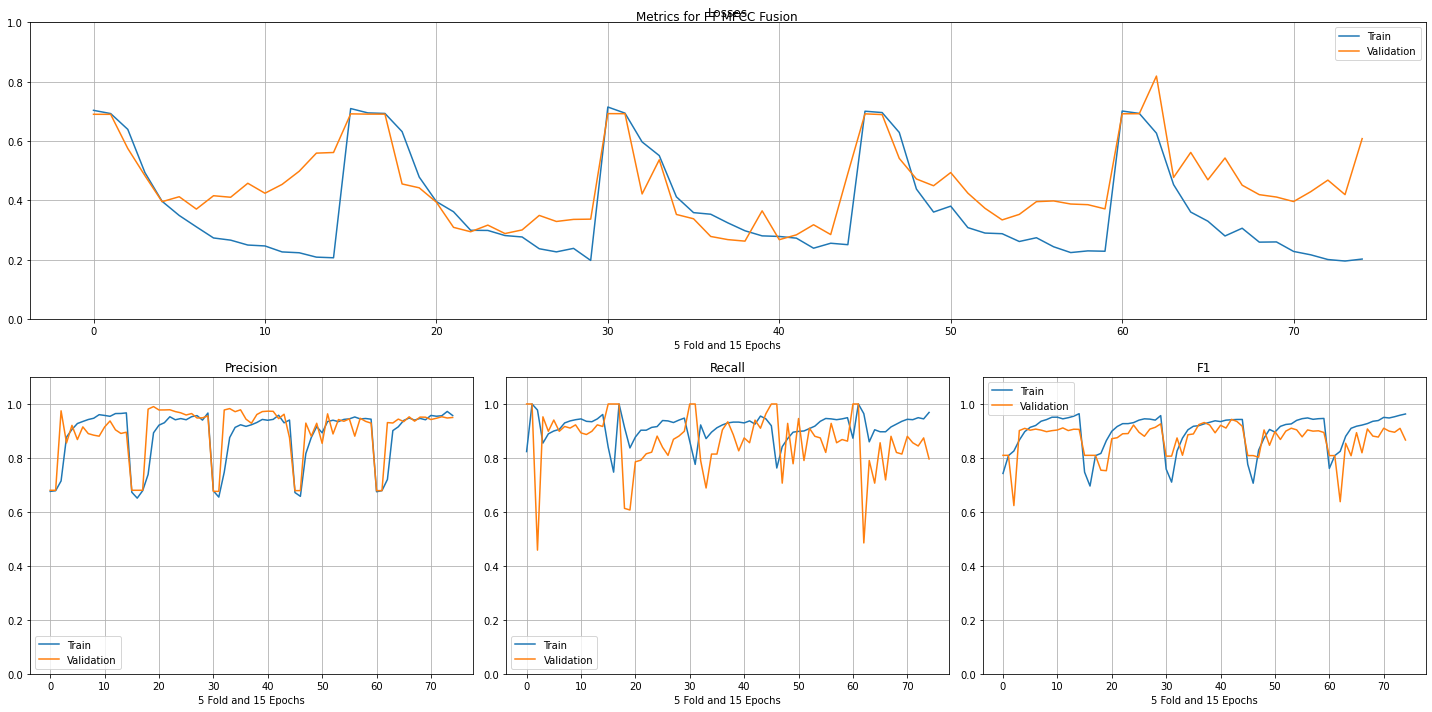

In [8]:
plot_results(ft_mfcc_fusion_results[0], 'FT MFCC Fusion')

In [9]:
ft_mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
12,0.941534,0.942943,0.958269,0.945783,0.925373,0.940120,0.239221,0.318217
13,0.942563,0.935385,0.930233,0.962025,0.955224,0.910180,0.255928,0.285201
7,0.926394,0.931343,0.922963,0.928571,0.929851,0.934132,0.324587,0.268148
14,0.956981,0.926380,0.966463,0.955696,0.947683,0.898810,0.198004,0.337109
6,0.919643,0.923547,0.916914,0.943750,0.922388,0.904192,0.353703,0.278760
...,...,...,...,...,...,...,...,...
2,0.828802,0.802721,0.816208,0.929134,0.841791,0.706587,0.629136,0.541753
3,0.816845,0.754579,0.738815,0.980952,0.913303,0.613095,0.631942,0.455672
4,0.864198,0.752768,0.893142,0.990291,0.837070,0.607143,0.478813,0.442639
2,0.824505,0.637795,0.720178,0.931034,0.964179,0.485030,0.626749,0.819173


In [10]:
ft_mel_fusion_results = run_k_fold(gpu, data, 'ft_vector', fusion=FusionTypes.MEL, k_folds=5,
                              epochs=15, balance_classes=True,
                              dropout_level=0.2, lr=7e-4,
                              clip_at=1.0, img_path=IMG_PATH)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:440: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /pytorch/aten/src/ATen/native/Convolution.cpp:660.)
  self.padding, self.dilation, self.groups)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.700 / Validation : 0.691
Time for epoch : 307.527563 seconds
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.691
Time for epoch : 23.466945 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.622 / Validation : 0.544
Time for epoch : 23.318964 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.476 / Validation : 0.428
Time for epoch : 23.343142 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.362 / Validation : 0.383
Time for epoch : 23.41175 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.319 / Validation : 0.381
Time for epoch : 23.434175 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.297 / Validation : 0.356
Time for epoch : 23.306684 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.254 / Validation : 0.463
Time for epoch : 23.41524 seconds
Epoch 9 / 15
Training 

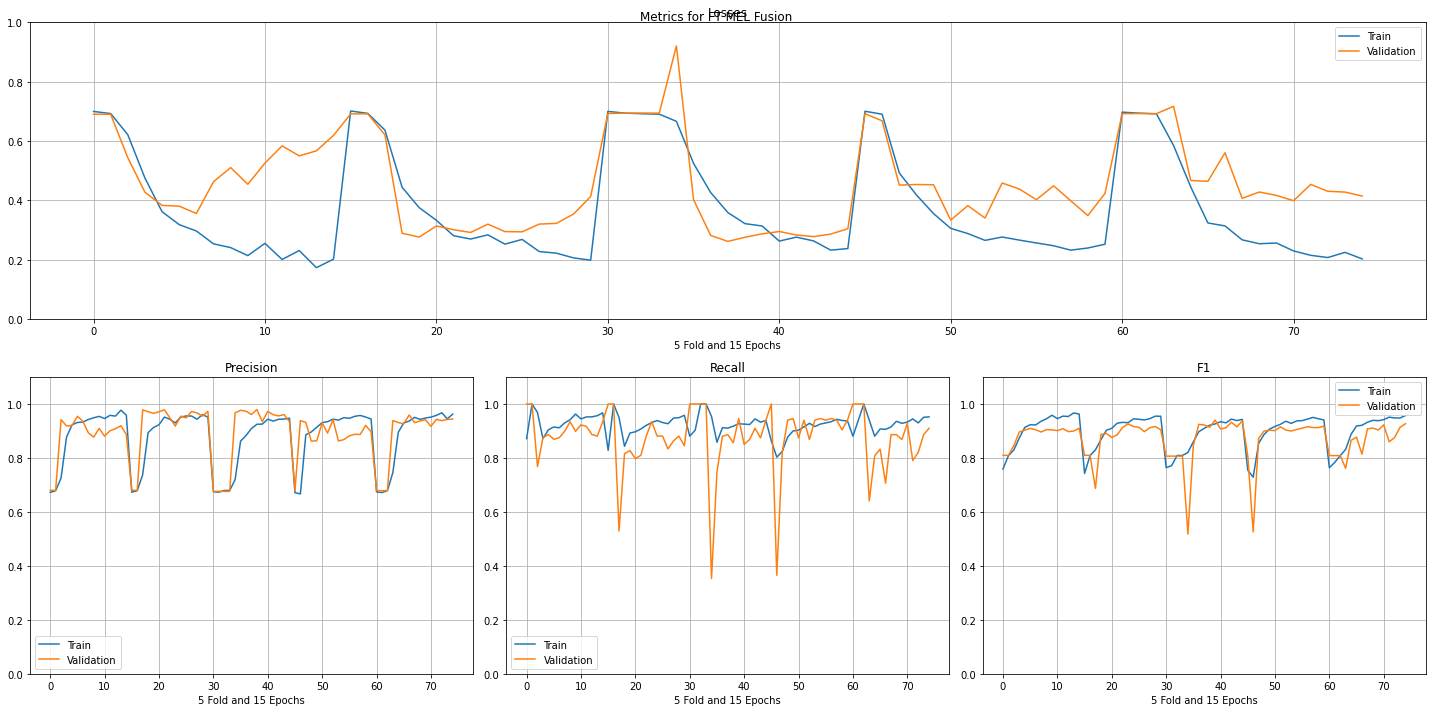

In [11]:
plot_results(ft_mel_fusion_results[0], 'FT MEL Fusion')

In [12]:
ft_mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
9,0.926174,0.940476,0.925484,0.934911,0.926866,0.946108,0.314053,0.287490
14,0.943028,0.937313,0.947289,0.934524,0.938806,0.940120,0.237983,0.304664
12,0.944072,0.932515,0.943368,0.955975,0.944776,0.910180,0.263808,0.278265
14,0.957239,0.926829,0.962293,0.944099,0.952239,0.910180,0.203276,0.414978
8,0.930545,0.926254,0.929851,0.918129,0.931241,0.934524,0.284116,0.320293
...,...,...,...,...,...,...,...,...
0,0.764249,0.806763,0.675057,0.676113,0.880597,1.000000,0.700178,0.693073
3,0.831683,0.761566,0.745562,0.938596,0.940299,0.640719,0.585098,0.717209
2,0.830065,0.687259,0.737515,0.978022,0.949178,0.529762,0.636990,0.620677
1,0.728504,0.525862,0.666667,0.938462,0.802985,0.365269,0.690590,0.668413
